# Projeto 1 - Conjunto de dados Weather

## Introdução

O conjunto de dados Weather é uma série temporal com informações por hora contendo as condições climáticas de uma determinada localidade. Os dados presentes são: temperatura, temperatura de ponto de orvalho, humidade relativa, velocidade do vento, visibilidade, pressão e condições.

**Biblitecas importadas**

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.style.use('bmh')

**Carregamento dos dados**

In [12]:
data = pd.read_csv('./data/weather_dataset.csv', index_col='Date/Time', parse_dates=True)

In [13]:
data.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [14]:
data.shape

(8784, 7)

In [15]:
data['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

## Questões

1. Encontre todos oc valores únicos da coluna 'Wind Speed' no conjunto de dados.

In [17]:
data.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [60]:
data['Wind Speed_km/h'].nunique()

34

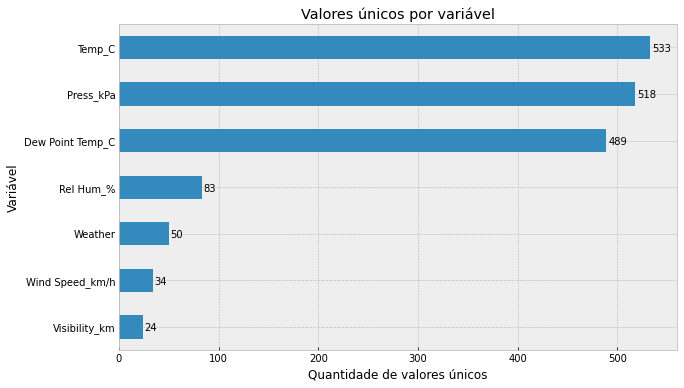

In [59]:
df = data.nunique().sort_values()
fig = plt.figure(figsize=(10, 6))
ax = data.nunique().sort_values().plot(kind='barh')
ax.set_axisbelow(True)
ax.set_xlabel('Quantidade de valores únicos')
ax.set_ylabel('Variável')
ax.set_title('Valores únicos por variável')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width()+2, p.get_y() + p.get_height()/3))
plt.show()


2. Encontre a quantidade de vezes que a coluna 'Weather' é igual a 'Clear'?

In [68]:
data[data['Weather'] == 'Clear']

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear
2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear
2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear
2012-01-05 20:00:00,-9.8,-15.7,62,9,25.0,100.83,Clear
2012-01-05 21:00:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...
2012-12-26 06:00:00,-13.4,-14.8,89,4,25.0,102.47,Clear
2012-12-28 10:00:00,-6.1,-8.6,82,19,24.1,101.27,Clear
2012-12-29 01:00:00,-11.9,-13.6,87,11,25.0,101.31,Clear


3. Encontre o número de vezes que a coluna 'Wind Speed' foi exatamente igual a 4 km/h.

In [73]:
data[data['Wind Speed_km/h'] == 4].shape[0]

474

4. Encontre a quantidade de valores nulos nos dados.

In [74]:
data.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

5. Qual a visubilidade média?

In [76]:
visibility_avg = data['Visibility_km'].mean()
visibility_avg

27.664446721311478

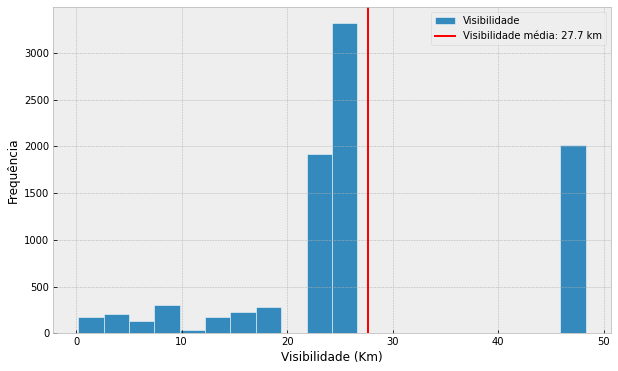

In [86]:
fig = plt.figure(figsize=(10, 6))
ax = data['Visibility_km'].plot(kind='hist', bins=20, edgecolor='white', label='Visibilidade')
ax.axvline(visibility_avg, color='red', label=f'Visibilidade média: {visibility_avg:.1f} km')

ax.set_xlabel('Visibilidade (Km)')
ax.set_ylabel('Frequência')
plt.legend()
plt.show()

6. Qual é o desvio padrão da variável 'Pressure'nos dados?

In [85]:
press_avg = data['Press_kPa'].mean()
press_std = data['Press_kPa'].std()
press_std

0.8440047459486483

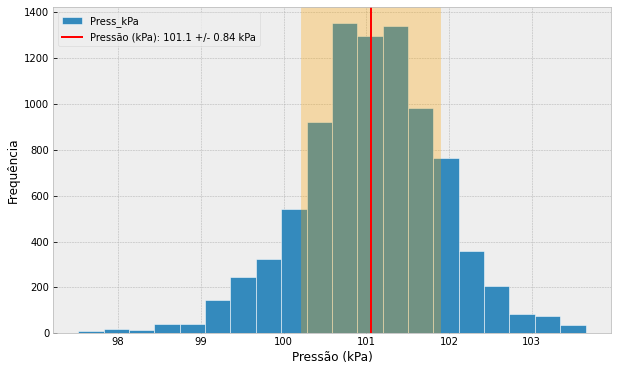

In [97]:
fig = plt.figure(figsize=(10, 6))
ax = data['Press_kPa'].plot(kind='hist', bins=20, edgecolor='white')
ax.axvline(press_avg, color='red', label=f'Pressão (kPa): {press_avg:.1f} +/- {press_std:.2f} kPa')
ax.axvspan(press_avg - press_std, press_avg + press_std, alpha=0.3, color='orange')
ax.set_axisbelow(True)
ax.set_xlabel('Pressão (kPa)')
ax.set_ylabel('Frequência')
plt.legend()
plt.show()